In [58]:
# Loading the required liabrary
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import plotly.express as px
import datetime as dt
from datetime import date
import seaborn as sns
import pycountry

In [59]:
sales = pd.read_csv("1000000 Sales Records.csv")
sales.sort_index()
print(f'No. of Observations in the dataset: {sales.shape[0]}\nNo. of features in the dataset: {sales.shape[1]}')
sales.head(5)

No. of Observations in the dataset: 1000000
No. of features in the dataset: 14


,Region,Country,Item Type,Sales Channel,Order Priority,Order Date,Order ID,Ship Date,Units Sold,Unit Price,Unit Cost,Total Revenue,Total Cost,Total Profit
0,Sub-Saharan Africa,South Africa,Fruits,Offline,M,7/27/2012,443368995,7/28/2012,1593,9.33,6.92,14862.69,11023.56,3839.13
1,Middle East and North Africa,Morocco,Clothes,Online,M,9/14/2013,667593514,10/19/2013,4611,109.28,35.84,503890.08,165258.24,338631.84
2,Australia and Oceania,Papua New Guinea,Meat,Offline,M,5/15/2015,940995585,6/4/2015,360,421.89,364.69,151880.40,131288.40,20592.00
3,Sub-Saharan Africa,Djibouti,Clothes,Offline,H,5/17/2017,880811536,7/2/2017,562,109.28,35.84,61415.36,20142.08,41273.28
4,Europe,Slovakia,Beverages,Offline,L,10/26/2016,174590194,12/4/2016,3973,47.45,31.79,188518.85,126301.67,62217.18


# checking for the information about the dataset

In [60]:
sales.info()
print(sales.columns)
print(f'No. of datatypes:{sales.dtypes.value_counts()}')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000000 entries, 0 to 999999
Data columns (total 14 columns):
 #   Column          Non-Null Count    Dtype  
---  ------          --------------    -----  
 0   Region          1000000 non-null  object 
 1   Country         1000000 non-null  object 
 2   Item Type       1000000 non-null  object 
 3   Sales Channel   1000000 non-null  object 
 4   Order Priority  1000000 non-null  object 
 5   Order Date      1000000 non-null  object 
 6   Order ID        1000000 non-null  int64  
 7   Ship Date       1000000 non-null  object 
 8   Units Sold      1000000 non-null  int64  
 9   Unit Price      1000000 non-null  float64
 10  Unit Cost       1000000 non-null  float64
 11  Total Revenue   1000000 non-null  float64
 12  Total Cost      1000000 non-null  float64
 13  Total Profit    1000000 non-null  float64
dtypes: float64(5), int64(2), object(7)
memory usage: 106.8+ MB
Index(['Region', 'Country', 'Item Type', 'Sales Channel', 'Order Priorit

# Observation 
The datatype for Order Date and Ship Date are object, for this reason  I would change it  to date datatype

In [61]:
#converting the date to datetime
sales["Order Date"] = pd.to_datetime(sales["Order Date"])#Changing Order date from object to datetime
sales["Ship Date"] = pd.to_datetime(sales["Ship Date"])#Changing Ship date from object to datetime

In [62]:
#Renaming the the Order Priority
sales["Order Priority"] = sales["Order Priority"].replace({"H": "High","L" :"Low","M":"Medium","C":"Not_Specified"})

In [63]:
# Replace space with another character
sales.columns = sales.columns.str.replace(' ', '_')
sales = sales.rename(columns={"Item_Type":"Products"})
sales.columns

Index(['Region', 'Country', 'Products', 'Sales_Channel', 'Order_Priority',
       'Order_Date', 'Order_ID', 'Ship_Date', 'Units_Sold', 'Unit_Price',
       'Unit_Cost', 'Total_Revenue', 'Total_Cost', 'Total_Profit'],
      dtype='object')

# Data Exploration Analysis


In [64]:
#Checking the missing_value in percentage
missing_percentage = sales.isnull().sum()/sales.shape[0]
print(missing_percentage)

Region            0.0
Country           0.0
Products          0.0
Sales_Channel     0.0
Order_Priority    0.0
Order_Date        0.0
Order_ID          0.0
Ship_Date         0.0
Units_Sold        0.0
Unit_Price        0.0
Unit_Cost         0.0
Total_Revenue     0.0
Total_Cost        0.0
Total_Profit      0.0
dtype: float64


# Observation
There's no null values in the dataset

In [65]:
#Checking for duplicate values
sales['Order_ID'].is_unique

False

In [66]:
# dropping ALL duplicte values
sales.drop_duplicates(subset ="Order_ID",
                     keep = False, 
                     inplace = True)
sales.shape

(800000, 14)

# Observation
After drop the duplicate from Order_ID, there 1229056 observations

## Creating new columns

In [67]:
#### sales['Year'] = sales['Order_Date'].apply(lambda x: x.strftime('%Y'))
sales['Year'] = [x.year for x in (sales['Order_Date'])]#list comprehension
sales['Month_Year'] = sales['Order_Date'].apply(lambda row: row.strftime('%Y-%m'))
sales['Month'] = sales['Order_Date'].apply(lambda x: x.strftime('%m'))
sales['Qtr'] = pd.to_numeric(sales['Month'])//4+1
sales['Year'] = sales['Order_Date'].apply(lambda x: x.strftime('%Y'))
sales['Qtr_Yr'] = sales['Year'].astype(str) + '-Q' + sales['Qtr'].astype(str)

In [68]:
sales['Week'] = sales["Order_Date"].dt.day
#sales['Hour'] = sales["Order Date"].dt.hour
sales["Week"] = sales["Week"].astype("str")

In [69]:
# generate country code  based on country name 
def alpha3code(column):#define the function
    Country_abb=[]#create empty list for country_abb
    for country in column: #iterate through country column
        try:
            code=pycountry.countries.get(name=country).alpha_3 #get the 3 abbre from the country
            Country_abb.append(code)
        except:
            Country_abb.append('None')
    return Country_abb
# create a column for code 
sales['Country_abb']=alpha3code(sales.Country)


## Ckeck unique values for categorical features

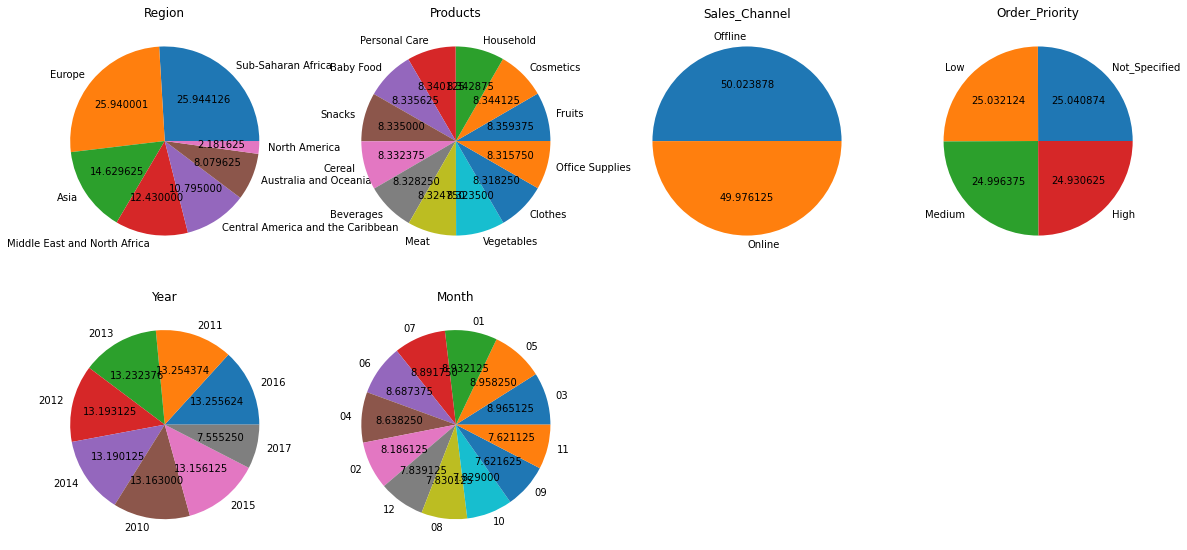

In [70]:
categorical_variables = {}
for col in sales.columns:
    if  (sales[col].nunique() < 20) & (sales[col].dtype == 'object'):
        categorical_variables[col] = sales[col].value_counts()
ind = 1
plt.figure(figsize =(20,20))
for c in categorical_variables:
    ax = plt.subplot(4,4, ind)
    ax.set_title(c)
    ax.pie(categorical_variables[c], labels= categorical_variables[c].keys(),autopct ="%f")
    ind +=1
plt.show()

# Statiscal Analysis and Visualisation for Europe

### The revenue and profit analysis by the world

In [71]:
fig = px.treemap(sales,
                 path=[px.Constant('World'), 
                 'Region', 'Country'], 
                 values='Total_Revenue',
                  color='Total_Profit',
                 hover_data=['Country_abb'])
fig.show()

### Analysis based on Europe

In [72]:
sales_filter =sales[sales["Region"]=="Europe"]
print(sales_filter.nunique())
print(f'No. of Observations in the dataset: {sales_filter.shape[0]}\nNo. of features in the dataset: {sales_filter.shape[1]}')

Region                 1
Country               48
Products              12
Sales_Channel          2
Order_Priority         4
Order_Date          2767
Order_ID          207520
Ship_Date           2816
Units_Sold         10000
Unit_Price            12
Unit_Cost             12
Total_Revenue     103245
Total_Cost        103130
Total_Profit      103153
Year                   8
Month_Year            91
Month                 12
Qtr                    4
Qtr_Yr                30
Week                  31
Country_abb           43
dtype: int64
No. of Observations in the dataset: 207520
No. of features in the dataset: 21


In [73]:
#checking statistical analysis
sales_filter_des = sales_filter.loc[:,['Units_Sold', 'Unit_Price',
       'Unit_Cost', 'Total_Revenue', 'Total_Cost', 'Total_Profit']]
sales_filter_des.describe()

,Units_Sold,Unit_Price,Unit_Cost,Total_Revenue,Total_Cost,Total_Profit
count,207520.000000,207520.000000,207520.000000,2.075200e+05,2.075200e+05,2.075200e+05
mean,4998.827689,265.614364,187.216348,1.327060e+06,9.353926e+05,3.916676e+05
std,2885.678177,216.987396,175.645708,1.468038e+06,1.148453e+06,3.785656e+05
min,1.000000,9.330000,6.920000,9.330000e+00,6.920000e+00,2.410000e+00
25%,2504.000000,81.730000,35.840000,2.781064e+05,1.619184e+05,9.534882e+04
50%,4997.000000,154.060000,97.440000,7.815773e+05,4.642141e+05,2.803942e+05
75%,7498.000000,421.890000,263.330000,1.817518e+06,1.189559e+06,5.646347e+05
max,10000.000000,668.270000,524.960000,6.682700e+06,5.249600e+06,1.738700e+06


# Statistical Yearly

### Question1:Yearly Total_Profit, Total_Revenue, Units_Sold, Unit_Price, Unit_Cost

In [74]:
#sales['Year'] = sales['Year'].astype(int)
def calculate_yearly(column):
    yearly = {}
    for _,rows in sales.iterrows():
        try:
            yearly[rows["Year"]] += rows[column]
        except KeyError:
            yearly[rows["Year"]] = rows[column]
    return yearly



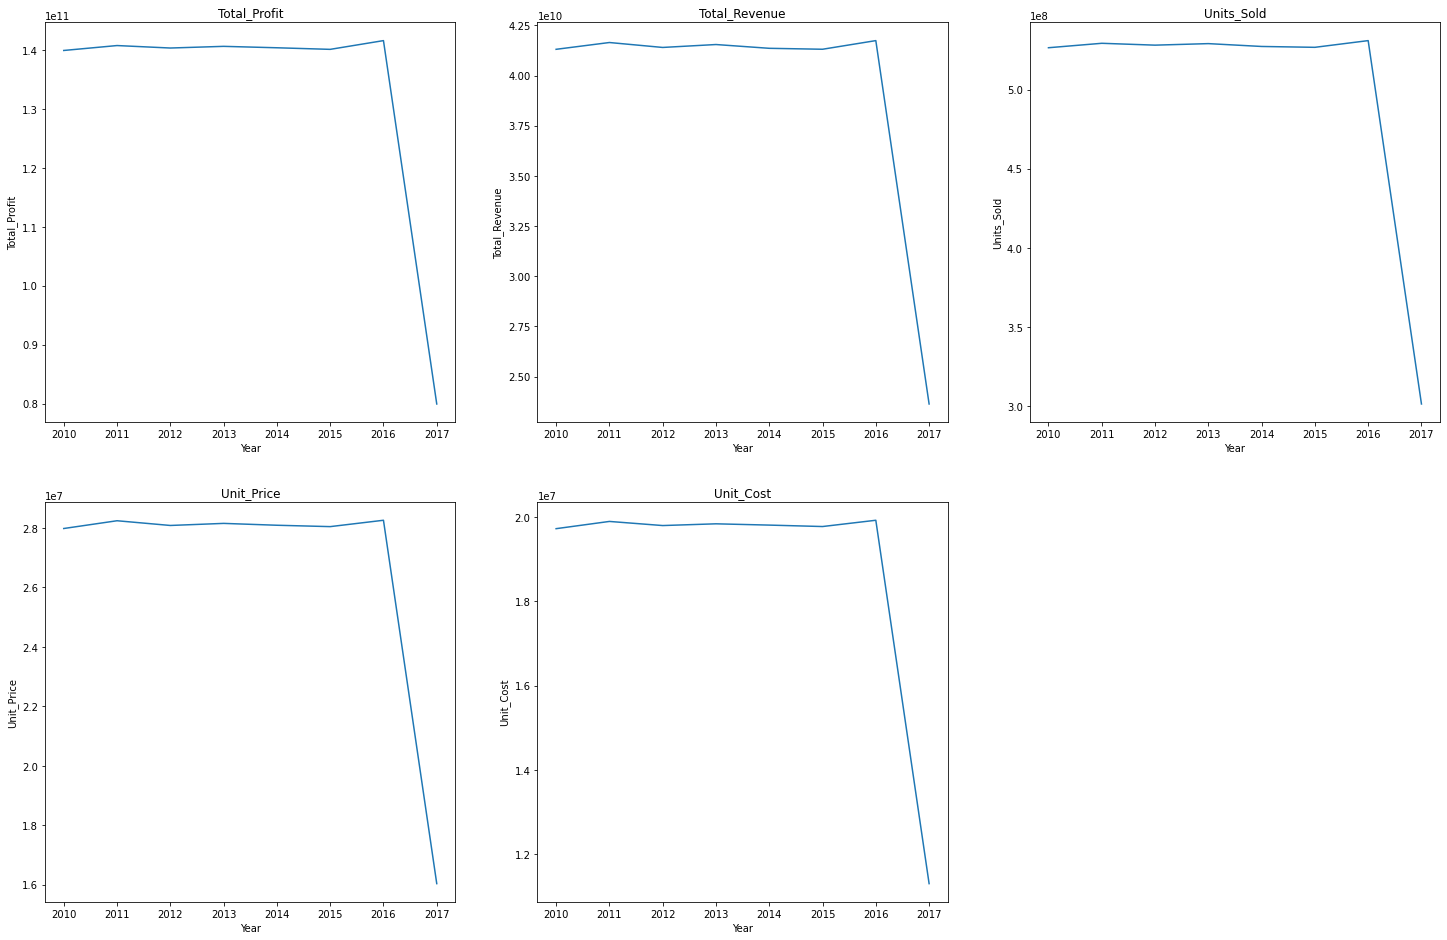

In [75]:
yearly_profit = calculate_yearly("Total_Revenue")
yearly_revenue = calculate_yearly("Total_Profit")
yearly_sold = calculate_yearly("Units_Sold")
yearly_price = calculate_yearly("Unit_Price")
yearly_cost = calculate_yearly("Unit_Cost")

#Lineplot for yearly 
ind =1
plt.figure(figsize=(25,25))
for index,name in zip([yearly_profit,yearly_revenue,yearly_sold,yearly_price,yearly_cost],["Total_Profit","Total_Revenue",
                        "Units_Sold","Unit_Price","Unit_Cost"]):
    ax = plt.subplot(3,3, ind)
    ax.set_title(name)
    sns.lineplot(ax =ax, x=0, y=1, data=pd.DataFrame(sorted(index.items())))
    ax.set(xlabel="Year", ylabel = name)
    ind += 1
    #plt.yticks(labels,(labels/1000000).astype(int))

### Question2:Monthly Total_Profit, Total_Revenue, Units_Sold

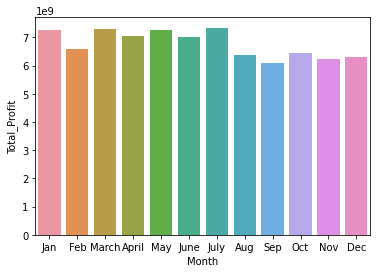

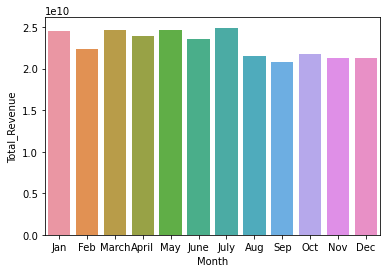

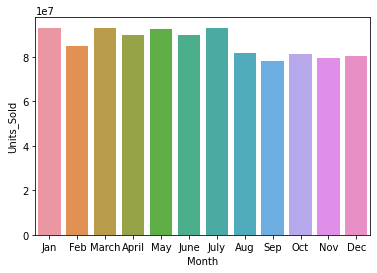

In [76]:
def calculate_monthly(column):
    monthly_profit = {}
    month = {1:"Jan", 2: "Feb", 3:"March", 4:"April", 5:"May", 6:"June", 7:"July", 8:"Aug", 9:"Sep", 10:"Oct", 11:"Nov", 12:"Dec"}
    for _,rows in sales_filter.iterrows():
        try:
            monthly_profit[pd.to_datetime(rows['Order_Date']).month] += rows[column]
        except KeyError:
            monthly_profit[pd.to_datetime(rows['Order_Date']).month] = rows[column]
    d = {i[0]: i[1] for i in [(month[item[0]],item[1]) for item in sorted(monthly_profit.items())]}
    ax = sns.barplot(data=pd.DataFrame(d,index=[0]))
    ax.set(xlabel= "Month", ylabel=column)
    plt.show()
calculate_monthly('Total_Profit')
calculate_monthly('Total_Revenue')
calculate_monthly('Units_Sold')

### Question3:The top10 country by total_revenue in Europe?

In [77]:

import plotly.express as px
sales_country = sales_filter.groupby(by="Country",as_index=False).mean()
sales_country = sales_country.sort_values(by="Total_Revenue",ascending=False)[:10]
fig = px.bar(sales_country,
       x="Country",
       y="Total_Revenue",
       color="Country",
       hover_data=["Country", "Total_Revenue"],
       labels={"Total_Revenue":"Total_Revenue ($)"},
       height=500,
       title="Total_Revenue by Country")

fig.show()


### Question4:What are the relationship between revenue and profit by country

In [78]:
country_pro_rev = sales_filter.loc[:,["Country","Total_Profit","Total_Revenue"]]
country_pro_rev = country_pro_rev.groupby(['Country'],
                                          as_index=False).mean()

country_pro_rev = country_pro_rev.sort_values(by='Total_Profit', 
                                            ascending=False)[:20]
px.scatter(country_pro_rev,
           x="Total_Profit",y="Total_Revenue",
           color="Country",
           height=500,
           labels={"Total_Profit":"Total_Profit ($)","Total_Revenue":"Totat_Revenue ($)"},
           title="Total_Revenue, Total_Profit By Country")

### Question5:Profit  by products for eac year

In [79]:
product = sales_filter.loc[:,["Month_Year","Total_Profit","Products"]]
product = product.groupby(['Month_Year','Products'], as_index=False).mean()
fig = px.line(product,
              x="Month_Year",
              y="Total_Profit",
              color="Products", 
              height=500,
              labels={"Total_Profit":"Total_Profit ($)"},
              title="Product, Total_Profit By Month_Year")
fig.show()

### Question6:What are the relationship between revenue and profit by products

In [80]:
product_relationship = sales_filter.loc[:,["Products","Total_Profit","Total_Revenue"]]
product_relationship = product_relationship.groupby(['Products'], as_index=False).mean()
fig = px.scatter(product_relationship,
           x="Total_Profit",
           y="Total_Revenue",
           color="Products",
           labels={"Total_Profit":"Total_Profit ($)","Total_Revenue":"Totat_Revenue ($)"},
           title="Total_Revenue, Total_Profit By Products")
fig.show()

### Question7:Which product are the most selling and why its?

<ipython-input-81-a777fabe1a7a>:14: UserWarning:

FixedFormatter should only be used together with FixedLocator

<ipython-input-81-a777fabe1a7a>:16: UserWarning:

Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.



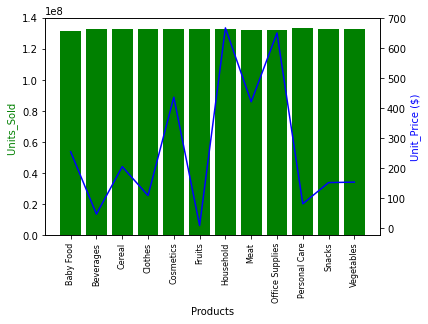

In [81]:
products = sales_filter.groupby('Products')
unit_sold = product_group.sum()['Units_Sold']
keys = [pair for pair, df in products]
prices = sales_filter.groupby('Products').mean()['Unit_Price']
#fig=plt.figure(figsize=(50,50))
fig, ax1 = plt.subplots()
ax2 = ax1.twinx()
ax1.bar(keys, unit_sold, color='g')
ax2.plot(keys, prices, color='b')

ax1.set_xlabel('Products')
ax1.set_ylabel('Units_Sold ', color='g')
ax2.set_ylabel('Unit_Price ($)', color='b')
ax1.set_xticklabels(keys, rotation='vertical', size=8)

fig.show()

### Question:9What is the overall QoQ sales?

In [82]:
sales_year = sales_filter.groupby(by="Qtr_Yr",as_index= False).mean()
fig = px.line(sales_year, 
              x='Qtr_Yr',
              y='Total_Revenue',
              height=500,
             labels={"Total_Revenue":"Total_Revenue ($)"},
              title="Total_Revenue By Qurter_Year")
fig.show()